In [20]:
import matplotlib.pyplot as plt
from scipy import spatial
import pandas as pd
from tqdm import tqdm
import numpy as np
import re

In [2]:
df= pd.read_csv('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/cricinfoNews.csv')

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_27036\2360000742.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/cricinfoNews.csv')


In [3]:
len(df)

133960

In [4]:
corpus=""
for i in range(0,15000):
  corpus+=str(df['headline'].iloc[i])
  corpus+=" "
  corpus+=str(df['summary'].iloc[i])
  corpus+='. '
   

In [5]:
clean_corpus=re.sub("[^A-Za-z. ]","",corpus)

In [6]:
stopwords=open('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/stopwords.txt',encoding="utf8").read().splitlines()
stopwords

['10',
 '39',
 'a',
 "a'",
 'able',
 'ableabout',
 'about',
 'above',
 'abroad',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'ad',
 'added',
 'adj',
 'adopted',
 'ae',
 'af',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'ag',
 'again',
 'against',
 'ago',
 'ah',
 'ahead',
 'ai',
 "ain't",
 'aint',
 'al',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ao',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'aq',
 'ar',
 'are',
 'area',
 'areas',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'arpa',
 'as',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'associated',
 'at',
 'au',
 'auth',
 'availabl

In [7]:
corpus=[ ]

In [8]:
lis=clean_corpus.split(".")

In [9]:
for i in lis:
  i=i.strip()
  k=i.split(" ")
  corpus.append(k)

In [10]:
print(corpus[0])

['Ireland', 'seamer', 'Boyd', 'Rankin', 'announces', 'retirement', '', 'Bowler', 'was', 'one', 'of', 'only', '', 'men', 'to', 'represent', 'two', 'nations', 'in', 'Test', 'cricket']


In [11]:
clean_corpused=[]
s=set()
for files in corpus:
  clean=[]
  for i in files:
    i = i.strip()
    i = i.lower()
    i = re.sub("\d+", "", i)
    i = re.sub('[^A-Za-z0-9]+', '', i)
    if(len(i)==0):
      continue
    if i not in stopwords:
      clean.append(i)
      s.add(i)
  clean_corpused.append(clean)

In [12]:
clean_corpused

[['ireland',
  'seamer',
  'boyd',
  'rankin',
  'announces',
  'retirement',
  'bowler',
  'represent',
  'nations',
  'cricket'],
 ['ireland',
  'women',
  'coach',
  'joyce',
  'relishing',
  'frustrating',
  'wait',
  'cricket',
  'series',
  'scotland',
  'irelands',
  'joyce',
  'appointed',
  'coach'],
 ['tamim',
  'iqbal',
  'complete',
  'trust',
  'mushfiqur',
  'rahim',
  'wicketkeeper',
  'tremendous',
  'potential',
  'deliver',
  'time',
  'odi',
  'captain',
  'liton',
  'das',
  'soumya',
  'sarkar'],
 ['womens',
  'varsity',
  'match',
  'set',
  'lords',
  'debut',
  'universities',
  'reach',
  'agreement',
  'campaigners',
  'achieve',
  'aim',
  'gender',
  'equality',
  'commitment',
  'doubleheader'],
 ['tim',
  'southee',
  'worried',
  'england',
  'workload',
  'wtc',
  'final',
  'acknowledges',
  'tests',
  'quick',
  'succession',
  'chance',
  'prepare',
  'physically',
  'leading'],
 ['dom',
  'sibley',
  'builds',
  'confidence',
  'injured',
  'finger',

In [13]:
word_to_index = {word: i for i, word in enumerate(s)}
index_to_Word = {i: word for i, word in enumerate(s)}
print(index_to_Word)
print(word_to_index)

{0: 'upstage', 1: 'tamed', 2: 'saga', 3: 'krishnamurthy', 4: 'raj', 5: 'sentiment', 6: 'pathway', 7: 'decry', 8: 'form', 9: 'walsh', 10: 'sports', 11: 'applicants', 12: 'trounced', 13: 'conservatively', 14: 'marker', 15: 'minutes', 16: 'doubledeclaration', 17: 'emergency', 18: 'zoom', 19: 'seats', 20: 'frame', 21: 'serene', 22: 'riyan', 23: 'gaikwad', 24: 'nocs', 25: 'happened', 26: 'srimantha', 27: 'viewers', 28: 'handily', 29: 'grandmother', 30: 'tacky', 31: 'hat', 32: 'compromised', 33: 'harrassment', 34: 'reasons', 35: 'sacked', 36: 'callup', 37: 'whets', 38: 'griffith', 39: 'vicechancellors', 40: 'flounder', 41: 'hunger', 42: 'camphers', 43: 'counted', 44: 'penalised', 45: 'untenable', 46: 'confronts', 47: 'reticketing', 48: 'overhauling', 49: 'centered', 50: 'venkatachar', 51: 'caravan', 52: 'departments', 53: 'innings', 54: 'roberts', 55: 'mckenzie', 56: 'khoda', 57: 'kockfakhar', 58: 'onceinageneration', 59: 'kents', 60: 'handsome', 61: 'iyers', 62: 'stacking', 63: 'revoke', 64

In [14]:
cooccurrence_matrix = np.zeros((len(s), len(s)))
window_size=6;
#count=0;
for doc in tqdm(clean_corpused):
    #print(doc)
    currentIndex = 0
    docLen = len(doc)
    while currentIndex < docLen:
        leftLimit = max(currentIndex-window_size, 0)
        rightLimit = min(currentIndex+window_size+1, docLen)
        contextWords = doc[leftLimit:currentIndex] + doc[currentIndex+1:rightLimit]
        
        targetWord = doc[currentIndex]
            
        targetIndex = word_to_index[targetWord]
        
        for contextWord in contextWords:
            contextIndex = word_to_index[contextWord]
            cooccurrence_matrix[targetIndex,contextIndex] += 1
            
        currentIndex += 1


print(cooccurrence_matrix)

100%|██████████| 15956/15956 [00:01<00:00, 13410.69it/s]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 2. 1. 2.]]


In [15]:
clean_corpused

[['ireland',
  'seamer',
  'boyd',
  'rankin',
  'announces',
  'retirement',
  'bowler',
  'represent',
  'nations',
  'cricket'],
 ['ireland',
  'women',
  'coach',
  'joyce',
  'relishing',
  'frustrating',
  'wait',
  'cricket',
  'series',
  'scotland',
  'irelands',
  'joyce',
  'appointed',
  'coach'],
 ['tamim',
  'iqbal',
  'complete',
  'trust',
  'mushfiqur',
  'rahim',
  'wicketkeeper',
  'tremendous',
  'potential',
  'deliver',
  'time',
  'odi',
  'captain',
  'liton',
  'das',
  'soumya',
  'sarkar'],
 ['womens',
  'varsity',
  'match',
  'set',
  'lords',
  'debut',
  'universities',
  'reach',
  'agreement',
  'campaigners',
  'achieve',
  'aim',
  'gender',
  'equality',
  'commitment',
  'doubleheader'],
 ['tim',
  'southee',
  'worried',
  'england',
  'workload',
  'wtc',
  'final',
  'acknowledges',
  'tests',
  'quick',
  'succession',
  'chance',
  'prepare',
  'physically',
  'leading'],
 ['dom',
  'sibley',
  'builds',
  'confidence',
  'injured',
  'finger',

In [16]:
nonzero_indices = np.nonzero(cooccurrence_matrix)
count=0
for i, j in zip(nonzero_indices[0], nonzero_indices[1]):
    count+=1;

print(count)

1248512


In [15]:
print(np.shape(cooccurrence_matrix))

(16761, 16761)


In [17]:
U, S, VT = np.linalg.svd(cooccurrence_matrix)

In [18]:
U_reduced = U[:, :2]

100%|██████████| 16761/16761 [00:29<00:00, 572.14it/s]


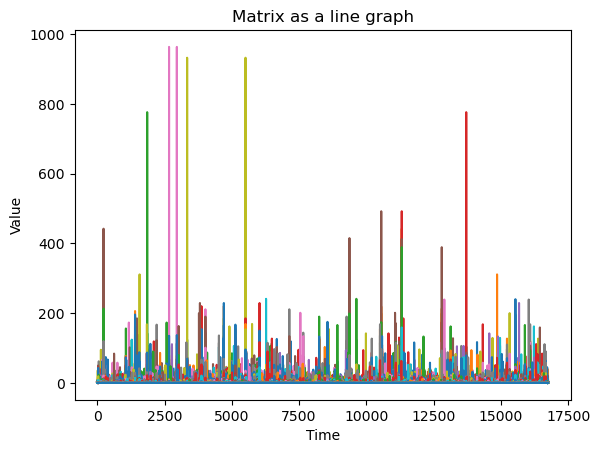

0it [00:00, ?it/s]

In [24]:
transposed_matrix = cooccurrence_matrix.T

# plot each row of the transposed matrix as a line
for row in tqdm(transposed_matrix):
    plt.plot(row)
    #print(row)

# set the x-axis label
plt.xlabel('Time')

# set the y-axis label
plt.ylabel('Value')

# set the title of the plot
plt.title('Matrix as a line graph')

# display the plot
tqdm(plt.show())

In [19]:
word1="walk"
word2="walking"
answer=cosine_similarity(word_to_index,word1,word2,U_reduced)

print(answer)

NameError: name 'cosine_similarity' is not defined

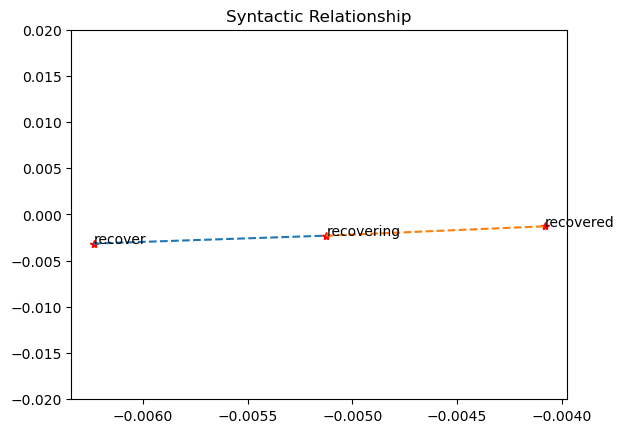

In [55]:
list1=["recover"]
list2=["recovering"]
list3=["recovered"]
for i in range(len(list1)):
    country=list1[i]
    board=list2[i]
    load=list3[i]
    
    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]
    loadIndex=word_to_index[load]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    loadVector=U_reduced[loadIndex]
    plt.plot(loadVector[0], loadVector[1], 'r*')
    plt.text(loadVector[0], loadVector[1],list3[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    l_values=[boardVector[0],loadVector[0]]
    m_values=[boardVector[1],loadVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.plot(l_values,m_values, linestyle="--")
    #plt.xlim(-0.002, 0.00)
    plt.ylim(-0.02, 0.02)

plt.title('Syntactic Relationship')
plt.show()

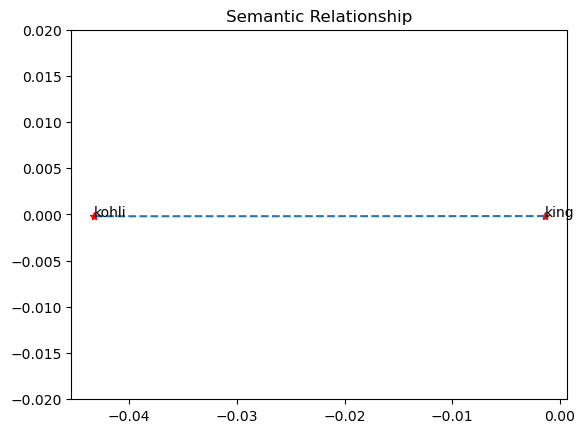

In [64]:
list1=["king"]
list2=["kohli"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    #plt.xlim(-0.003, 0.00)
    plt.ylim(-0.02, 0.02)

plt.title('Semantic Relationship')
plt.show()

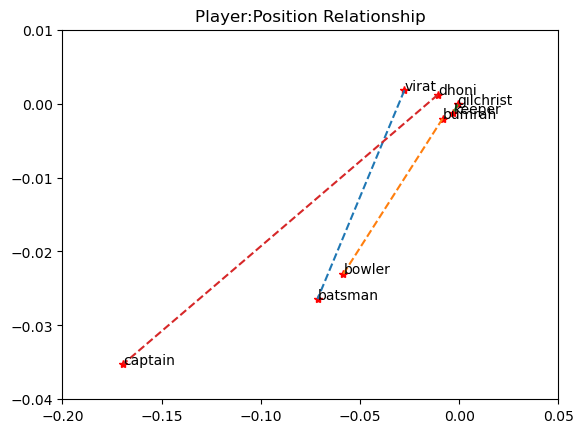

In [40]:
list1=["virat","bumrah","gilchrist","dhoni"]
list2=["batsman","bowler","keeper","captain"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.2, 0.05)
    plt.ylim(-0.04, 0.01)

plt.title('Player:Position Relationship')
plt.show()

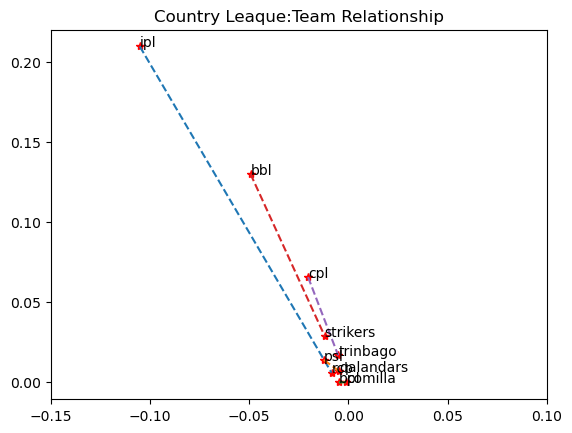

In [50]:
list1=["ipl","psl","bpl","bbl","cpl"]
list2=["rcb","qalandars","comilla","strikers","trinbago"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.15, 0.1)
    #plt.ylim(-0.15, 0.02)
    
plt.title('Country Leaque:Team Relationship')
plt.show()

In [1]:
list1=["india","pakistan","australia","england"]
list2=["mumbai","lahore","sydney","london"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]

    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.3, 0.2)
    plt.ylim(-0.15, 0.1)

plt.title('Country:City relationship')
plt.show()

NameError: name 'word_to_index' is not defined

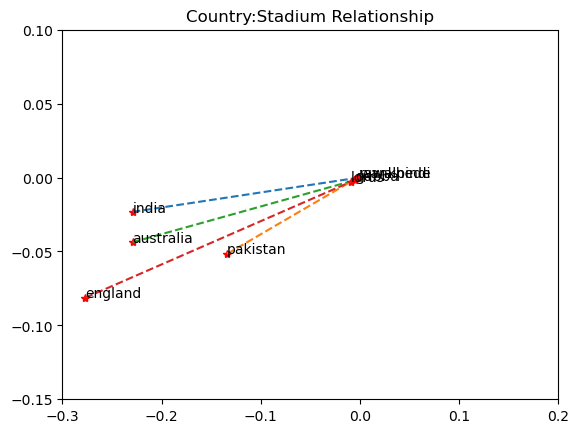

In [161]:

list1=["india","pakistan","australia","england"]
list2=["wankhede","rawalpindi","gabba","lords"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=word_to_index[country]
    boardIndex=word_to_index[board]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=U_reduced[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.3, 0.2)
    plt.ylim(-0.15, 0.1)

plt.title('Country:Stadium Relationship')
plt.show()


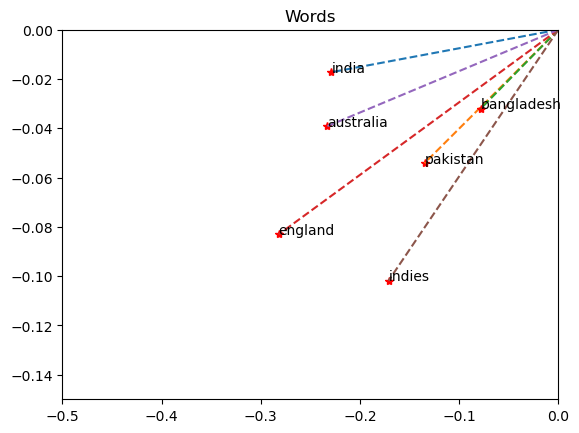

In [70]:
list1=["india","pakistan","bangladesh","england","australia","indies"]

for i in range(len(list1)):
    country=list1[i]

    countryIndex=word_to_index[country]

    countryVector=U_reduced[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    
    x_values = [0, countryVector[0]]
    y_values = [0, countryVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.5, 0.0)
    plt.ylim(-0.15, 0.0)

plt.title('Words')
plt.show()

In [71]:

list1="afridi"
list2="pakistan"
list3="virat"
list4="india"

#england-india+virat=root


country1=list1
board=list2
country2=list3
board1=list4

country1Index=word_to_index[country1]
boardIndex=word_to_index[board]
country2Index=word_to_index[country2]
board1Index=word_to_index[board1]

country1Vector=U_reduced[country1Index]
country2Vector=U_reduced[country2Index]


boardVector=U_reduced[boardIndex]

board1Vector=U_reduced[board1Index]

board1Vector=U_reduced[board1Index]
print("bcci------>india")
print("ecb------->??")

board2vector=country2Vector-country1Vector+boardVector
print("Predicted:")
print(board2vector)
print("Actual: England ")
print(board1Vector)


print("Cosine Similarity of Actual and Predicted:")
x_values = [countryVector[0], boardVector[0]]
y_values = [countryVector[1], boardVector[1]]


print(1-spatial.distance.cosine(board2vector, board1Vector))

print("Answer= England")

bcci------>india
ecb------->??
Predicted:
[-0.15859416 -0.05172781]
Actual: England 
[-0.22876686 -0.01725681]
Cosine Similarity of Actual and Predicted:
0.9713395164739352
Answer= England
